# Binnings

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


df = pd.read_csv('nyc_tree_census.csv')
df  = df.dropna()
print(df.shape)
df.head(3)

(47695, 6)


,tree_id,trunk_diam,status,health,spc_common,neighborhood
0,199250,8,Alive,Good,crab apple,Lincoln Square
1,136891,17,Alive,Good,honeylocust,East Harlem North
2,200218,3,Alive,Good,ginkgo,Chinatown


#### Get min and max value for trunk_diam
`Note`:  trunk_diam is measured in inches

In [2]:
print(np.min(df.trunk_diam))
np.max(df.trunk_diam)

0


389

#### Visualize

(0.0, 100.0)

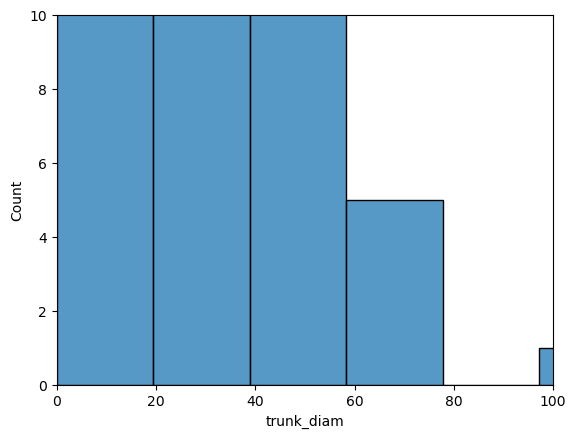

In [3]:
sns.histplot(df.trunk_diam, bins=20)
plt.ylim(0,10)
plt.xlim(0,100)

Our value to bin is from 0 - 389. lets divide this into 4 bins, each bin has a 100 datapoint.

1. small = 0-25
2. medium = 26-50
3. large = 51-100
4. super_large = 100-400

#### Store the boundaries

`Note:` 

 * small(<= 5inches)
 * medium(6-10inches)
 * large(11-25inches) 
 * super_large(>= 26inches)

In [4]:
bins = [0, 5, 10, 25, 400]
bins_name = ['small(< 5inches)', 'medium(6-10inches)', 'large(11-25inches)', 'super_large(> 26inches)']

#### Create new binned_trunk_diam column that bins the values of the ‘trunk_diam’ column

In [5]:
df['binned_trunk_diam'] = pd.cut(df['trunk_diam'], bins, labels = bins_name)

#### Uncomment code to verify

In [6]:
# example datapoints 5
dfx = df[df['trunk_diam']== 5]
dfx.binned_trunk_diam.unique()

['small(< 5inches)']
Categories (4, object): ['small(< 5inches)' < 'medium(6-10inches)' < 'large(11-25inches)' < 'super_large(> 26inches)']

#### There's seems a null values in our binned_trunk_diam

In [7]:
df.isna().sum()

tree_id               0
trunk_diam            0
status                0
health                0
spc_common            0
neighborhood          0
binned_trunk_diam    18
dtype: int64

#### Show null values
Null values are datapoints that has zero trunk diameter. We can delete these records. 

In [8]:
df1 = df[df.isna().any(axis=1)]
df1.head(3)

,tree_id,trunk_diam,status,health,spc_common,neighborhood,binned_trunk_diam
854,424438,0,Alive,Good,eastern redcedar,Baisley Park,NaN
4354,541153,0,Alive,Good,Norway maple,Todt Hill-Emerson Hill-Heartland Village-Light...,NaN
14040,637186,0,Alive,Good,Sophora,South Ozone Park,NaN


In [9]:
# drop nulls
df = df.dropna()

#### Frequency of each bins

In [10]:
df['binned_trunk_diam'].value_counts()

large(11-25inches)         18446
small(< 5inches)           14157
medium(6-10inches)         11236
super_large(> 26inches)     3838
Name: binned_trunk_diam, dtype: int64

#### Visualize

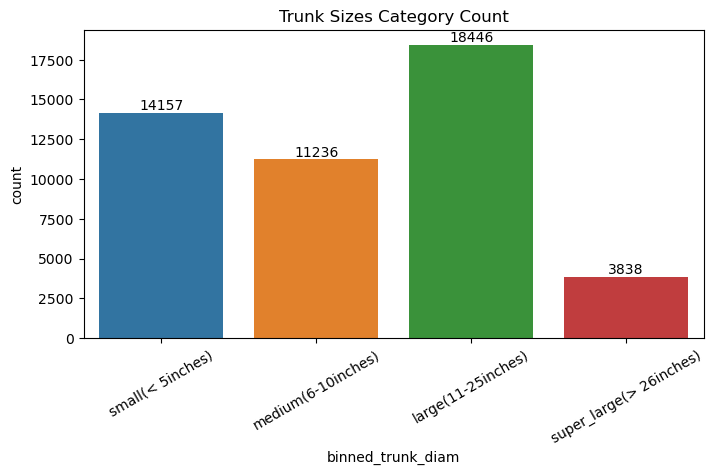

In [11]:
plt.figure(figsize = (8,4))
ax = sns.countplot(x = 'binned_trunk_diam', data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title('Trunk Sizes Category Count')

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

#### Proportion

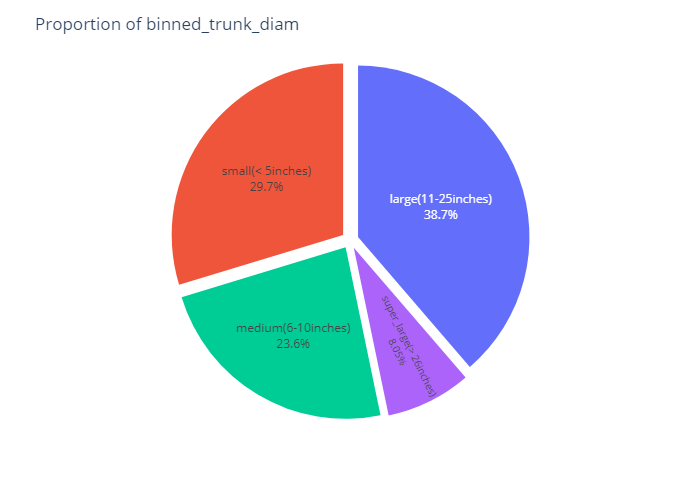

In [12]:
import plotly.express as px
fig = px.pie(df, 'binned_trunk_diam')

fig.update_layout(title="Proportion of binned_trunk_diam")
fig.update_traces(textposition='inside',
                  textinfo='percent+label', showlegend=False)


fig.update_traces(pull=0.05)
fig.show('png')